In [290]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

seed = 42

In [291]:
pd.set_option('display.max_rows', None)

In [292]:
train = pd.read_csv('train.csv', low_memory=False)
test = pd.read_csv('test.csv', low_memory=False)

### EDA

In [293]:
print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


In [294]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
# list of categorical columns
categoric = [f for f in train.columns if train.dtypes[f] == 'object']

# list of numerical columns wihout ID and SalePrice
numeric = [f for f in train.columns if train.dtypes[f] != 'object']
numeric.remove('Survived')
numeric.remove('PassengerId')

print('there are: ' + str(len(numeric)) + ' numeric features:' + str(numeric))
print('there are: ' + str(len(categoric)) + ' categoric features:' + str(categoric))

there are: 5 numeric features:['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
there are: 5 categoric features:['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [296]:
# description of numerical variables in the train dataset
train[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:>

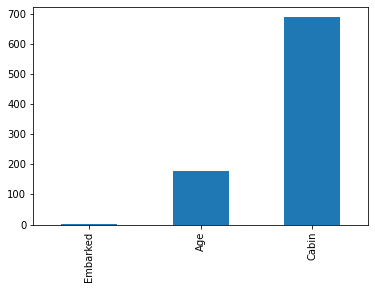

In [297]:
# Cheking for null values train dataset

null = train.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

<AxesSubplot:>

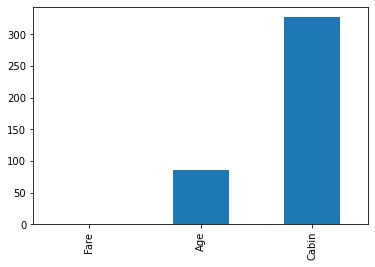

In [298]:
# Cheking for null values test dataset

null = test.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

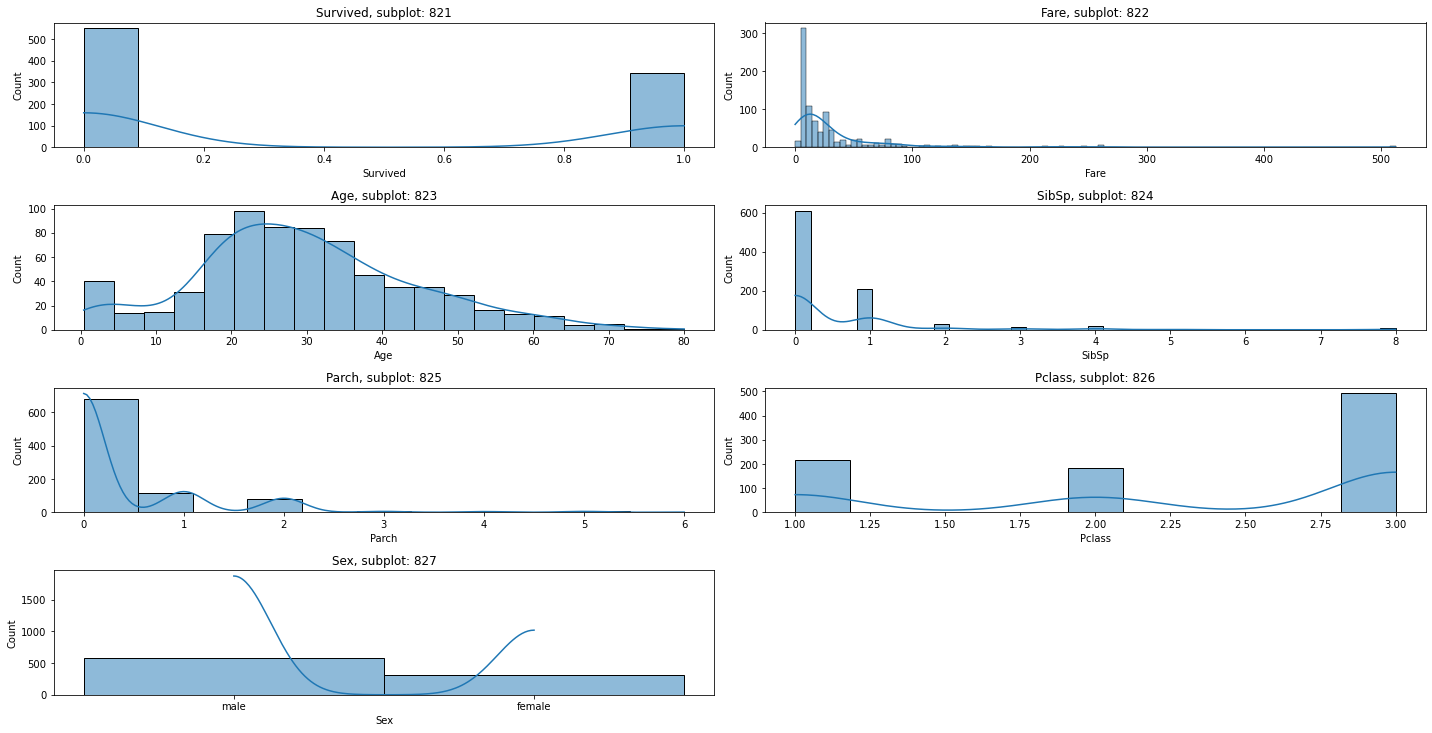

In [299]:
a = 8  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

list = ['Survived', 'Fare', 'Age', 'SibSp', 'Parch', 'Pclass', 'Sex']
fig = plt.figure(figsize=(20,20))

for col in list:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col, a, b, c))
    plt.xlabel(col)
    #plt.hist(x=train[col], bins=25, color='grey')
    sns.histplot(data=train, x=col, kde=True)
    
    c = c + 1
plt.tight_layout()
plt.show()

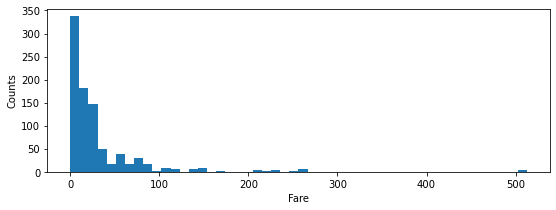

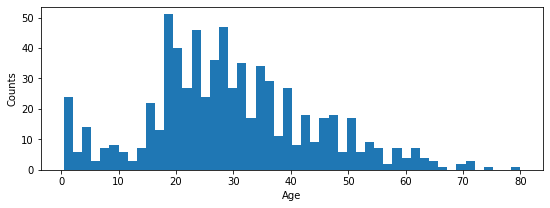

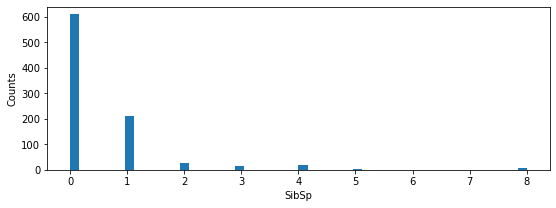

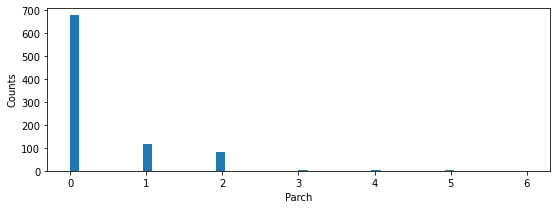

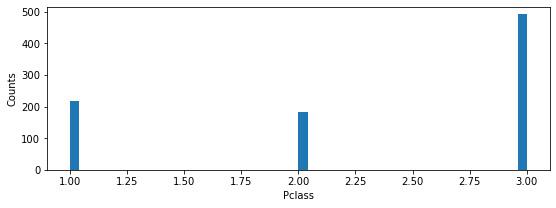

In [300]:
list1 = ['Fare', 'Age', 'SibSp', 'Parch', 'Pclass'] 
    
for i in list1:    
    plt.figure(figsize = (9,3))
    plt.hist(train[i], bins = 50)
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

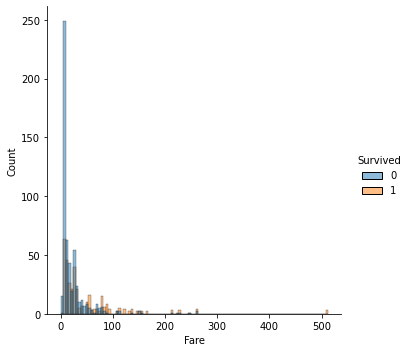

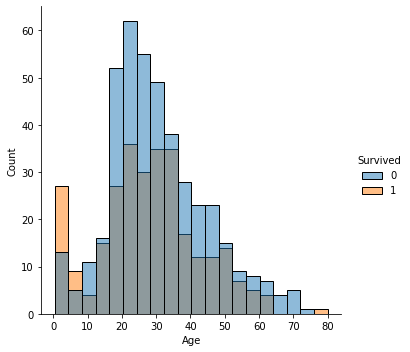

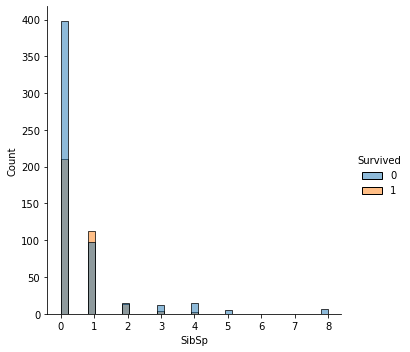

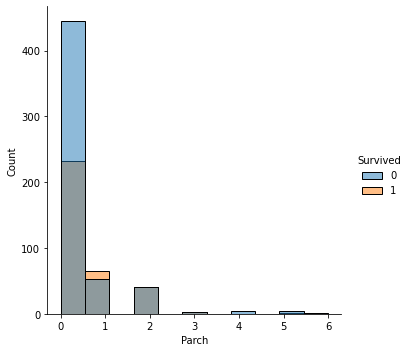

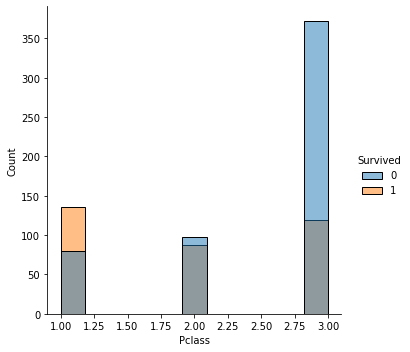

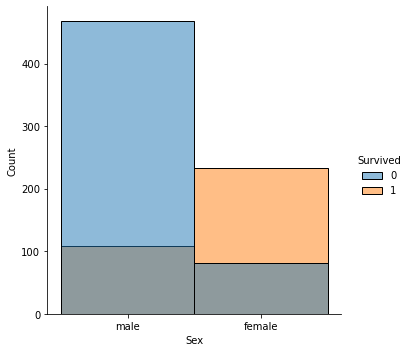

In [301]:
list1 = ['Fare', 'Age', 'SibSp', 'Parch', 'Pclass', 'Sex']

for i in list1:
    sns.displot(train, x = i, hue = 'Survived', alpha = 0.5);

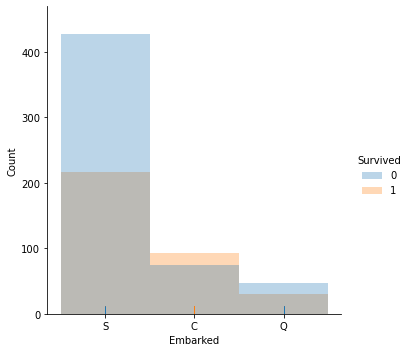

In [302]:
sns.displot(data=train, x="Embarked", hue="Survived", rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

In [303]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [304]:
train[['Pclass','Survived']].groupby('Pclass',as_index = False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [305]:
train[['SibSp','Survived']].groupby('SibSp',as_index = False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [306]:
train[['Parch','Survived']].groupby('Parch',as_index = False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [307]:
train[['Sex','Survived']].groupby('Sex',as_index = False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Missing values

In [308]:
# Deal with missing values on train and test separately to avoid data leakage

<AxesSubplot:>

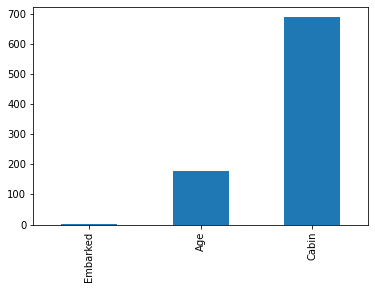

In [309]:
# Cheking for null values train

null = train.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

<AxesSubplot:>

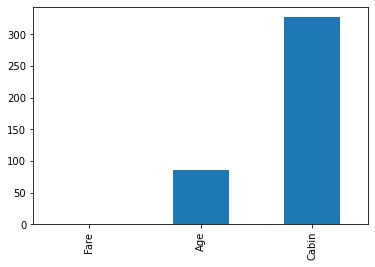

In [310]:
# Cheking for null values test

null = test.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

In [311]:
# Embarked

# First in we replace the missing values in Embarked with the median of the groupby between sex and Pclass

train.groupby(['Pclass', 'Sex'])['Embarked'].value_counts()

Pclass  Sex     Embarked
1       female  S            48
                C            43
                Q             1
        male    S            79
                C            42
                Q             1
2       female  S            67
                C             7
                Q             2
        male    S            97
                C            10
                Q             1
3       female  S            88
                Q            33
                C            23
        male    S           265
                C            43
                Q            39
Name: Embarked, dtype: int64

In [312]:
train['Embarked'] = train.groupby(['Pclass','Sex'], sort=False)['Embarked'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [313]:
train['Embarked'].isnull().sum()

0

In [314]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [315]:
# Age

# We can groupby PClass, sex and embarked and use the median of the age

train.groupby(['Pclass', 'Sex', 'Embarked'])['Age'].median()

Pclass  Sex     Embarked
1       female  C           37.00
                Q           33.00
                S           34.00
        male    C           36.50
                Q           44.00
                S           42.00
2       female  C           22.00
                Q           30.00
                S           29.00
        male    C           29.50
                Q           57.00
                S           30.00
3       female  C           14.25
                Q           20.00
                S           23.00
        male    C           26.00
                Q           27.00
                S           25.00
Name: Age, dtype: float64

In [316]:
train['Age'] = train.groupby(['Pclass', 'Sex', 'Embarked'], sort=False)['Age'].apply(lambda x: x.fillna(x.median()))

In [317]:
train['Age'].isnull().sum()

0

In [318]:
# The same for test 

test['Age'] = test.groupby(['Pclass', 'Sex', 'Embarked'], sort=False)['Age'].apply(lambda x: x.fillna(x.median()))

In [319]:
test['Age'].isnull().sum()

0

In [320]:
# Cabin

# The first letter of the cabin, represents da deck in which the cabin is located
# We will create a new column ['Deck'] using this first letter. n means null

train['Deck'] = train['Cabin'].astype(str).str[0]
train['Deck'] = train['Deck'].replace({'n': None})

test['Deck'] = test['Cabin'].astype(str).str[0]
test['Deck'] = test['Deck'].replace({'n': None})

In [321]:
train.Deck.isnull().sum()

687

In [322]:
train.groupby(['Pclass', 'Embarked'])['Deck'].value_counts()

Pclass  Embarked  Deck
1       C         B       22
                  C       21
                  D       11
                  A        7
                  E        5
        Q         C        2
        S         C       36
                  B       25
                  E       20
                  D       18
                  A        8
                  T        1
2       C         D        2
        Q         E        1
        S         F        8
                  E        3
                  D        2
3       C         F        1
        Q         F        1
        S         G        4
                  E        3
                  F        3
Name: Deck, dtype: int64

In [323]:
train['Deck'] = train.groupby(['Pclass', 'Embarked'], sort=False)['Deck'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [324]:
train['Deck'].isnull().sum()

0

In [325]:
train['Deck'].value_counts()

G    347
F    300
C     80
B     66
D     48
E     34
A     15
T      1
Name: Deck, dtype: int64

In [326]:
test.groupby(['Pclass', 'Embarked'])['Deck'].value_counts()

Pclass  Embarked  Deck
1       C         C       20
                  B       10
                  E        6
                  D        5
                  A        4
        Q         C        1
        S         C       14
                  B        8
                  D        6
                  A        3
                  E        3
2       C         D        2
        S         F        5
3       C         F        2
        S         F        1
                  G        1
Name: Deck, dtype: int64

In [327]:
# The same for test 

# this groupby still leaves some NaN as some groups mode is NaN

test['Deck'] = test.groupby(['Pclass', 'Embarked'], sort=False)['Deck'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))


In [328]:
test.Deck.isnull().sum()

45

In [329]:
# This replace the remaining 45 NaN with the mode.

test['Deck'] = test['Deck'].fillna(test['Deck'].mode()[0])

In [330]:
test.Deck.isnull().sum()

0

In [331]:
# Fare on test set

test['Fare'] = test.groupby(['Pclass', 'Embarked'], sort=False)['Fare'].apply(lambda x: x.fillna(x.median()))

In [332]:
print(test.Fare.isnull().sum())

0


### Concat train and test dataset 

In [333]:
# To use in Missing values and Feature Engineering

Titanic=pd.concat([train.drop(['Survived'],axis=1),test])

### Feature Engineering

In [334]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C


In [335]:
# some people share the cabin, even if they have a SibSp and Parch of 0
# bin the Age and Fare
# new feature ['Family'] = ['SibSp']+['Parch']
# new feature ['companions'] number of same ['ticket'] - 1
# get dummies in ['Embarked']
# get dummies in ['Deck']
# ['Sex'] = male = 0, female = 1

# Discard ['Name'], ['ticket'], ['Cabin'], ['Embarked'], ['Deck'], ['SibSp'], ['Parch']

In [336]:
# ['companion']

In [337]:
train['Ticket'].value_counts().head()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64

In [338]:
train['Ticket_count'] = train['Ticket'].map(train['Ticket'].value_counts())

In [339]:
train['Companion'] = train['Ticket_count'] -1 

#train['Companion'] = train['Companion'].clip(lower=0)


In [340]:
# ['Family']

In [341]:
train['Family'] = train['SibSp'] + train['Parch']


c:\Users\JLCoito\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


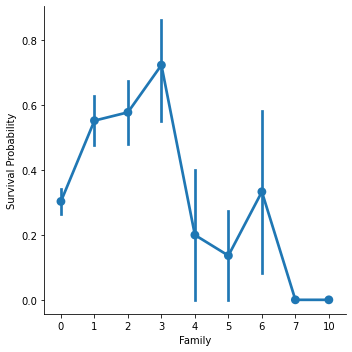

In [342]:
fsur = sns.factorplot(x="Family", y="Survived", data=train)
fsur = fsur.set_ylabels("Survival Probability")

In [343]:
train['Single'] = train['Family'].map(lambda x: 1 if x == 0 else 0)
train['Small_Family'] = train['Family'].map(lambda x: 1 if 1 <= x <=2 else 0)
train['Medium_Family'] = train['Family'].map(lambda x: 1 if 3 <= x <=4 else 0)
train['Large_Family'] = train['Family'].map(lambda x: 1 if x >=5 else 0)

In [344]:
# Sex

In [345]:
sex_dict = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(sex_dict)

In [346]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_count,Companion,Family,Single,Small_Family,Medium_Family,Large_Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,G,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C,1,0,1,0,1,0,0


In [347]:
train.shape

(891, 20)

In [348]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,F
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,F


In [349]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Ticket_count',
       'Companion', 'Family', 'Single', 'Small_Family', 'Medium_Family',
       'Large_Family'],
      dtype='object')

In [350]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_count,Companion,Family,Single,Small_Family,Medium_Family,Large_Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,G,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C,1,0,1,0,1,0,0


In [351]:
train.drop(['Name', 
            'SibSp', 
            'Parch', 
            'Ticket',
            'Ticket_count',
            'Cabin'
            ], axis=1, inplace=True)

In [352]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Companion,Family,Single,Small_Family,Medium_Family,Large_Family
0,1,0,3,0,22.0,7.2500,S,G,0,1,0,1,0,0
1,2,1,1,1,38.0,71.2833,C,C,0,1,0,1,0,0


In [353]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck'],
      dtype='object')

In [354]:
# Apply feature enginearing to test dataset

In [355]:
# ['companion']

test['Ticket_count'] = test['Ticket'].map(test['Ticket'].value_counts())
test['Companion'] = test['Ticket_count'] -1 

In [356]:
# ['Family']

test['Family'] = test['SibSp'] + test['Parch']

In [357]:
test['Single'] = test['Family'].map(lambda x: 1 if x == 0 else 0)
test['Small_Family'] = test['Family'].map(lambda x: 1 if 1 <= x <=2 else 0)
test['Medium_Family'] = test['Family'].map(lambda x: 1 if 3 <= x <=4 else 0)
test['Large_Family'] = test['Family'].map(lambda x: 1 if x >=5 else 0)

In [358]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_count,Companion,Family,Single,Small_Family,Medium_Family,Large_Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,F,1,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,F,1,0,1,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,F,1,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,F,1,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,F,1,0,2,0,1,0,0


In [359]:
# Sex

sex_dict = {'male':0, 'female':1}
test['Sex'] = test['Sex'].map(sex_dict)

In [360]:
test.drop(['Name', 
            'SibSp', 
            'Parch', 
            'Ticket',
            'Ticket_count',
            'Cabin'
            ], axis=1, inplace=True)

In [361]:
test.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Companion,Family,Single,Small_Family,Medium_Family,Large_Family
0,892,3,0,34.5,7.8292,Q,F,0,0,1,0,0,0
1,893,3,1,47.0,7.0000,S,F,0,1,0,1,0,0


In [362]:
embarked_dict = {'C':1, 'Q':2, 'S':3}
deck_dict = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}

train['Embarked'] = train['Embarked'].map(embarked_dict)
test['Embarked'] = test['Embarked'].map(embarked_dict)

train['Deck'] = train['Deck'].map(deck_dict)
test['Deck'] = test['Deck'].map(deck_dict)

In [363]:
#train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Companion,Family,Single,Small_Family,Medium_Family,Large_Family


### Prepare datasets

In [364]:
# Return data to train and test
df_train = train.copy()
df_test = test.copy()

In [365]:
df_train.set_index('PassengerId', drop=True, inplace=True)
df_test.set_index('PassengerId', drop=True, inplace=True)

In [366]:
df_train.drop(['Survived'], axis = 1, inplace = True)

In [367]:
y = train[['Survived']]
y.index = train['PassengerId'] 

### Separation of train and test

In [368]:
from sklearn.model_selection import train_test_split

In [369]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2, random_state=seed)

In [370]:
# Standart scale train test

from sklearn.preprocessing import MinMaxScaler

zscore = MinMaxScaler(feature_range=(0,1))

In [371]:
X_train_s = zscore.fit_transform(X_train)
X_test_s = zscore.fit_transform(X_test)
df_test_s = zscore.fit_transform(df_test)

In [372]:
X_train_s = pd.DataFrame(X_train_s, columns = X_train.columns)
X_test_s = pd.DataFrame(X_test_s, columns = X_test.columns)
df_test_s = pd.DataFrame(df_test_s, columns = df_test.columns)

In [373]:
# Attention if the minmax range change or the scaler change, concat the ohe dataframes at this phase.

### Running some models

In [374]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score


In [375]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = seed, max_iter = 500)
parameters = {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed) # takes more time

In [376]:
%%time

clf_lr = GridSearchCV(lr, parameters, cv = cv, n_jobs=-1).fit(X_train_s, y_train.values.ravel())

Wall time: 452 ms


In [377]:
clf_lr.score(X_test_s, y_test) # accuracy -> competition score <- important

0.8100558659217877

In [378]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


In [379]:
%%time

for k in range(1, 200, 10):

  knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1).fit(X_train_s, y_train.values.ravel())

  accuracy = knn.score(X_test_s, y_test)

  print('Accuracy for k = ', k , 'is: ', accuracy)

Accuracy for k =  1 is:  0.770949720670391
Accuracy for k =  11 is:  0.7932960893854749
Accuracy for k =  21 is:  0.8044692737430168
Accuracy for k =  31 is:  0.7877094972067039
Accuracy for k =  41 is:  0.8044692737430168
Accuracy for k =  51 is:  0.7988826815642458
Accuracy for k =  61 is:  0.8100558659217877
Accuracy for k =  71 is:  0.8044692737430168
Accuracy for k =  81 is:  0.8044692737430168
Accuracy for k =  91 is:  0.7932960893854749
Accuracy for k =  101 is:  0.7988826815642458
Accuracy for k =  111 is:  0.776536312849162
Accuracy for k =  121 is:  0.7541899441340782
Accuracy for k =  131 is:  0.7541899441340782
Accuracy for k =  141 is:  0.7486033519553073
Accuracy for k =  151 is:  0.7597765363128491
Accuracy for k =  161 is:  0.7374301675977654
Accuracy for k =  171 is:  0.7374301675977654
Accuracy for k =  181 is:  0.7318435754189944
Accuracy for k =  191 is:  0.7318435754189944
Wall time: 487 ms


In [380]:
%%time

parameters = {'n_neighbors': range(1,21, 1)}

clf_knn = GridSearchCV(knn, parameters, cv = cv, n_jobs=-1).fit(X_train_s, y_train.values.ravel())

Wall time: 1.59 s


In [381]:
clf_knn.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=4)

In [382]:
clf_knn.best_score_ # accuracy -> competition score <- important

0.7991197183098591

In [383]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state = seed)

parameters = {'n_estimators': [5,8,10,12,20,25], 'max_depth': [3,5,8,10,12], 'min_samples_split': [5, 10, 15]}

In [384]:
%%time

clf_random_f = GridSearchCV(clf_rf, parameters, cv = cv, n_jobs=-1).fit(X_train_s, y_train.values.ravel())

Wall time: 9.33 s


In [385]:
clf_random_f.best_params_

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 12}

In [386]:
y_preds = clf_random_f.predict(X_test_s)

In [387]:
accuracy_score(y_test, y_preds) # accuracy -> competition score <- important

0.7653631284916201

In [388]:
# SVM

from sklearn.svm import SVC

svc = SVC(random_state = seed, probability = True, verbose = True)

In [389]:
parameters = {'C':[1,2,3,4,5,8,9,10], 'kernel': ['poly', 'rbf'], 'cache_size': [1000]}

In [390]:
%%time

clf_svc = GridSearchCV(svc, parameters, cv = cv).fit(X_train_s, y_train.values.ravel())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [391]:
clf_svc.best_params_

{'C': 2, 'cache_size': 1000, 'kernel': 'poly'}

In [392]:
y_preds = clf_svc.predict(X_test_s)
accuracy_score(y_test, y_preds) # accuracy -> competition score <- important

0.8044692737430168

In [393]:
# Feature selection

# for logistical regression

lr = LogisticRegression(**clf_lr.best_params_).fit(X_train_s, y_train.values.ravel())

In [394]:
lr.coef_

array([[-2.17481074,  2.65831662, -2.56827554,  1.05323152, -0.40229404,
         0.39364676,  0.37321031, -1.15552817,  0.46995119,  0.71305533,
         0.22036694, -1.08287908]])

In [395]:
coefs = pd.DataFrame(lr.coef_[0], index = X_train_s.columns, columns = ['Coef']).sort_values(by = 'Coef', ascending = False)
coefs

,Coef
Sex,2.658317
Fare,1.053232
Small_Family,0.713055
Single,0.469951
Deck,0.393647
Companion,0.373210
Medium_Family,0.220367
Embarked,-0.402294
Large_Family,-1.082879
Family,-1.155528


In [397]:
X_train_feature = X_train_s[['Sex', 'Fare', 'Age', 'Pclass', 'Family']]
X_test_feature = X_test_s[['Sex', 'Fare', 'Age', 'Pclass', 'Family']]

In [398]:
lr = LogisticRegression(random_state = seed, max_iter = 500)
parameters = {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

In [399]:
%%time

clf_lr = GridSearchCV(lr, parameters, cv = cv, n_jobs=-1).fit(X_train_feature, y_train.values.ravel())

Wall time: 325 ms


In [400]:
clf_lr.score(X_test_feature, y_test) # accuracy -> competition score <- important

0.8156424581005587